## Read Data

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open("velocities7.json") as json_file:
    data = json.load(json_file)

with open("bboxes7.json") as json_file:
    bbData = json.load(json_file)

ids = list(data.keys())
bbKeys = list(bbData.keys())

all_samples = data.values()
all_bbs = bbDaya.values()

all_lengths = list(map(lambda arr: len(arr), all_samples))

rand_ids = np.random.choice(ids, size=10, replace=False)

 **Get Number of registered objects and info about velocities registered**

Number of regisstered objects: 133
Mean number of samples per object: 11.729323308270677
Median number of samples per object: 5.0
STD of samples per object: 23.405907556953323



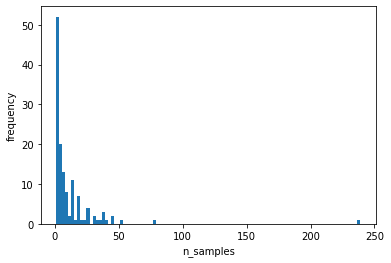

In [17]:
print(f"Number of regisstered objects: {len(all_lengths)}")
print(f"Mean number of samples per object: {np.mean(all_lenghts)}")
print(f"Median number of samples per object: {np.median(all_lenghts)}")
print(f"STD of samples per object: {np.std(all_lenghts)}")
print()

_ = plt.hist(all_lenghts, bins=100)
_ = plt.xlabel("n_samples")
_ = plt.ylabel("frequency")

**Let's see in general how are the velocities registered** 

Or is it better to watch this over a random sample of n vehicles?

Number of registered speeds: 1560
Mean velocity: 55.408113548241985
Median velocity: 46.816884215211715
velocity STD: 64.4511686496646
portion of samples with speed > 70: 0.2128205128205128
portion of samples with speed > 100: 0.08012820512820513



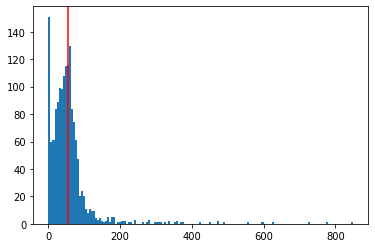

In [45]:
all_samples_concat = np.hstack(list(all_samples))
print(f"Number of registered speeds: {len(all_samples_concat)}")
print(f"Mean velocity: {np.mean(all_samples_concat)}")
print(f"Median velocity: {np.median(all_samples_concat)}")
print(f"velocity STD: {np.std(all_samples_concat)}")
print(f"portion of samples with speed > 70: {len(all_samples_concat[all_samples_concat > 70])/len(all_samples_concat)}")
print(f"portion of samples with speed > 100: {len(all_samples_concat[all_samples_concat > 100])/len(all_samples_concat)}")
print()

_ = plt.hist(all_samples_concat, bins=150, density=False)
_ = plt.axvline(x=np.mean(all_samples_concat), color='red')

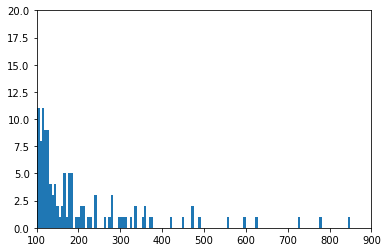

In [33]:
_ = plt.hist(all_samples_concat, bins=150, density=False)
_ = plt.xlim((100,900))
_ = plt.ylim((0,20))

**Get top 10 objects with the most samples**

In [21]:
sorted_samples = sorted(all_samples, reverse=True, key=lambda arr: len(arr))[:10]
sorted_lens = list(map(lambda arr: len(arr), sorted_samples))
inds = [range(len(sorted_sample)) for sorted_sample in sorted_samples]
sorted_lens

sorted_bbs = sorted(all_bbs, reverse=True, key=lambda arr: len(arr))[:10]

[239, 79, 53, 46, 44, 40, 39, 37, 37, 35]

**Plot velocities for those objects**

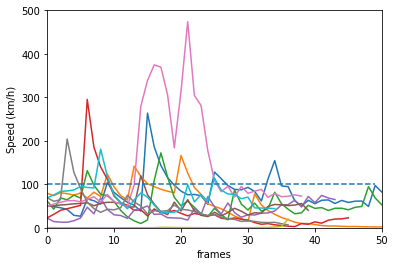

In [26]:
for i in range(len(inds)):
    _ = plt.plot(inds[i], sorted_samples[i], )
    _ = plt.xlim(0, 50)
    _ = plt.ylim(0,500)
_ = plt.plot(range(50), [100]*50, '--')
_ = plt.xlabel("frames")
_ = plt.ylabel("Speed (km/h)")

**Check for the change in bounding box size**

In [ ]:
for i in range(len(inds)):
    _ = plt.plot(inds[i], sorted_bbs[i], )
    _ = plt.xlim(0, 50)
_ = plt.xlabel("frames")
_ = plt.ylabel("Diagonal size")

** Let's have a better picture of the variability of every object**

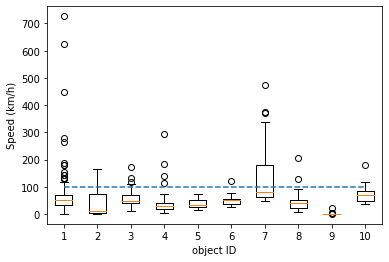

In [60]:
fig, ax = plt.subplots()
_ = ax.boxplot(np.array(sorted_samples, dtype=object))
_ = plt.plot(range(1,11), [100]*10, '--')
_ = ax.set_xlabel("object ID")
_ = ax.set_ylabel("Speed (km/h)")


In [ ]:
fig, ax = plt.subplots()
_ = ax.boxplot(np.array(sorted_bbs, dtype=object))
_ = ax.set_xlabel("object ID")
_ = ax.set_ylabel("BB diagonal size (pix)")

** Code to plot the histogram of an object in concrete (application?)**

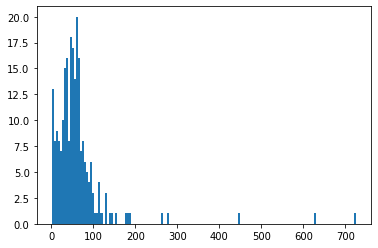

In [23]:
data_ = list(map(lambda num: int(num), data["0"]))
results = plt.hist(data_, bins=150, density=False)
plt.show()